<a href="https://colab.research.google.com/github/jaypeeml/firstrepo/blob/main/rpg_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**:
ABC company is a NBFC & deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
ABC wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

**Task:** Design a model that will be able to predict if customer should be eligible for loan or not.

**Deliverables:**
Provide the following:
* The source code you used to build the model and make predictions. (You are
free to use any language and any open-source package/library)
* A .csv file containing the predictions of the validation data. You can add the target column (‘Loan_Status) to the validation data or simply provide it alone with the Loan_ID column.

Programing Language: R

**Please send feedback / suggestions to [jaiprakash.prajapati@outlook.com](mailto:jaiprakash.prajapati@outlook.com)**


Installing required packages

In [1]:
install.packages("data.table")
install.packages("dplyr")
install.packages("dplyr")
install.packages("finalfit")
install.packages("sjmisc")
install.packages("caTools")
install.packages("ROSE")
install.packages("Matrix")
install.packages("MICE")
install.packages("xgboost")
install.packages("DiagrammeR")
install.packages("e1071")
install.packages("caret")
install.packages("ROCit")
install.packages("rcompanion")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘bdsmatrix’, ‘GGally’, ‘gridExtra’, ‘lme4’, ‘mice’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘sjlabelled’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load the Required packages

In [2]:
library(data.table)
library(dplyr)
library(dplyr)
library(finalfit)
library(sjmisc)
library(caTools)
library(ROSE)
library(Matrix)
library(MICE)
library(xgboost)
library(DiagrammeR)
library(e1071)
library(caret)
library(ROCit)
library(rcompanion)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loaded ROSE 0.0-3




In [3]:
# Read Data from CSV file
data <- fread("train.csv", sep=",", nrows=-1L, header=TRUE,
      stringsAsFactors=FALSE)

head(data)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
LP002051,Male,Yes,0,Graduate,No,2400,2167,115,360,1,Semiurban,Y
LP002255,Male,No,3+,Graduate,No,9167,0,185,360,1,Rural,Y
LP002877,Male,Yes,1,Graduate,No,1782,2232,107,360,1,Rural,Y
LP002931,Male,Yes,2,Graduate,Yes,6000,0,205,240,1,Semiurban,N
LP002743,Female,No,0,Graduate,No,2138,0,99,360,0,Semiurban,N
LP002101,Male,Yes,0,Graduate,,63337,0,490,180,1,Urban,Y


In [4]:
# check structure of dataframe
str(data)

Classes ‘data.table’ and 'data.frame':	491 obs. of  13 variables:
 $ Loan_ID          : chr  "LP002051" "LP002255" "LP002877" "LP002931" ...
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "Yes" "No" "Yes" "Yes" ...
 $ Dependents       : chr  "0" "3+" "1" "2" ...
 $ Education        : chr  "Graduate" "Graduate" "Graduate" "Graduate" ...
 $ Self_Employed    : chr  "No" "No" "No" "Yes" ...
 $ ApplicantIncome  : int  2400 9167 1782 6000 2138 63337 6045 6400 9357 1378 ...
 $ CoapplicantIncome: num  2167 0 2232 0 0 ...
 $ LoanAmount       : int  115 185 107 205 99 490 115 200 292 167 ...
 $ Loan_Amount_Term : int  360 360 360 240 360 180 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 0 1 0 1 1 1 ...
 $ Property_Area    : chr  "Semiurban" "Rural" "Rural" "Semiurban" ...
 $ Loan_Status      : chr  "Y" "Y" "Y" "N" ...
 - attr(*, ".internal.selfref")=<externalptr> 


# Handle missing data

In [5]:
#replace Blank missing with NA
data[data==" "]<-NA
data[data==""]<-NA


In [6]:
# if contains NA
anyNA(data)

[1] TRUE

In [7]:
# Checking if NA count 
sum(is.na(data))

[1] 127

In [8]:
# Check missing values  in the data
summary(data)

   Loan_ID             Gender            Married           Dependents       
 Length:491         Length:491         Length:491         Length:491        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:491         Length:491         Min.   :  150   Min.   :    0    
 Class :character   Class :character   1st Qu.: 2892   1st Qu.:    0    
 Mode  :character   Mode  :character   Median : 3813   Median : 1213    
                                       Mean   : 5450   Mean   : 1672    
                   

Loan_ID	          category
Gender	          category
Married	          category
Dependents	      category
Education	      category
Self_Employed	  category
Credit_History	  category
Property_Area	  category
Loan_Status	      category
ApplicantIncome	  Numeric
CoapplicantIncome Numeric
LoanAmount	      Numeric
Loan_Amount_Term  Numeric

In [9]:
#convert character to factor
df <- mutate_at(data, vars(Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status), as.factor)
str(df)

Classes ‘data.table’ and 'data.frame':	491 obs. of  13 variables:
 $ Loan_ID          : chr  "LP002051" "LP002255" "LP002877" "LP002931" ...
 $ Gender           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 NA 1 ...
 $ Married          : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 2 1 1 1 2 ...
 $ Dependents       : Factor w/ 4 levels "0","1","2","3+": 1 4 2 3 1 1 1 1 4 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 1 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 NA 1 2 2 1 ...
 $ ApplicantIncome  : int  2400 9167 1782 6000 2138 63337 6045 6400 9357 1378 ...
 $ CoapplicantIncome: num  2167 0 2232 0 0 ...
 $ LoanAmount       : int  115 185 107 205 99 490 115 200 292 167 ...
 $ Loan_Amount_Term : int  360 360 360 240 360 180 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 0 1 0 1 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 2 1 1 2 2 3 1 1 2 3 ...
 $ Loan_Status      : Factor w/ 2 le

In [10]:
# creating label for future use
nlabel <- c("ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term")
clabel <- c("Gender","Married","Dependents","Education","Self_Employed","Property_Area")

# **Check the nature of missing data**
Datasets may contain missing values for various reasons. They are often encoded as NA, blanks or any other place values. Training a model with a missing dataset can drastically impact the ML model quality.

There are three main types of missing data:
* Missing completely at random (MCAR)
* Missing at random (MAR)
* Not missing at random (NMAR)

**Will use Package ff_glimpse function from package "finalfit" for analyzing the natire of missing data**

In [11]:
set.seed(1)
explanatory = c("ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",
                "Gender","Married","Dependents","Education","Self_Employed","Property_Area")
dependent = "Loan_Status"

df %>% 
  ff_glimpse(dependent, explanatory)

$Continuous
                              label var_type   n missing_n missing_percent
ApplicantIncome     ApplicantIncome    <int> 491         0             0.0
CoapplicantIncome CoapplicantIncome    <dbl> 491         0             0.0
LoanAmount               LoanAmount    <int> 474        17             3.5
Loan_Amount_Term   Loan_Amount_Term    <int> 480        11             2.2
                    mean     sd   min quartile_25 median quartile_75     max
ApplicantIncome   5450.0 6383.0 150.0      2891.5 3813.0      5929.0 81000.0
CoapplicantIncome 1672.2 3157.0   0.0         0.0 1213.0      2253.5 41667.0
LoanAmount         146.7   82.9   9.0       100.0  128.0       169.5   700.0
Loan_Amount_Term   341.9   65.9  12.0       360.0  360.0       360.0   480.0

$Categorical
                      label var_type   n missing_n missing_percent levels_n
Loan_Status     Loan_Status    <fct> 491         0             0.0        2
Gender               Gender    <fct> 480        11             2.2        2
Married             Married    <fct> 488         3             0.6        2
Dependents       Dependents    <fct> 478        13             2.6        4
Education         Education    <fct> 491         0             0.0        2
Self_Employed Self_Employed    <fct> 463        28             5.7        2
Property_Area Property_Area    <fct> 491         0             0.0        3
                                        levels        levels_count
Loan_Status                           "N", "Y"            153, 338
Gender           "Female", "Male", "(Missing)"         97, 383, 11
Married               "No", "Yes", "(Missing)"         172, 316, 3
Dependents    "0", "1", "2", "3+", "(Missing)" 280, 80, 78, 40, 13
Education           "Graduate", "Not Graduate"             393, 98
Self_Employed         "No", "Yes", "(Missing)"         391, 72, 28
Property_Area    "Rural", "Semiurban", "Urban"       144, 178, 169
                            levels_percent
Loan_Status                         31, 69
Gender                    19.8, 78.0,  2.2
Married                35.03, 64.36,  0.61
Dependents    57.0, 16.3, 15.9,  8.1,  2.6
Education                           80, 20
Self_Employed             79.6, 14.7,  5.7
Property_Area                   29, 36, 34

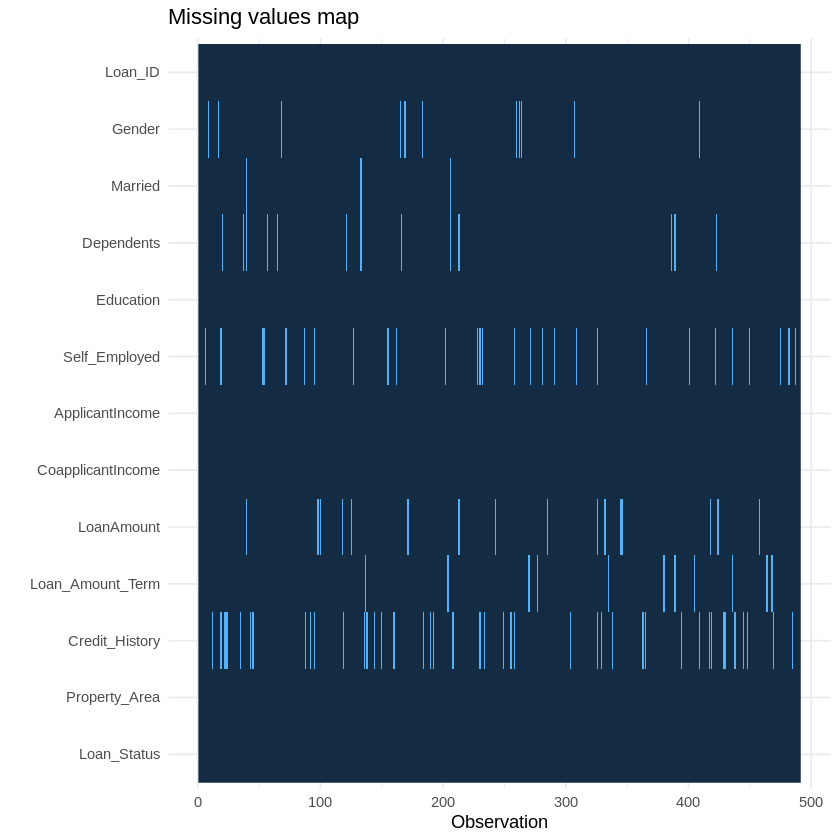

In [12]:
# Identify missing values in each variable
df %>% 
  missing_plot()

,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Married,Gender,Loan_Amount_Term,Dependents,LoanAmount,Self_Employed,
416,1,1,1,1,1,1,1,1,1,1,1,0
26,1,1,1,1,1,1,1,1,1,1,0,1
14,1,1,1,1,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,1,1,0,0,2
8,1,1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,0,0,1,2
9,1,1,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,1,0,1,1,0,2
1,1,1,1,1,1,1,1,0,0,1,1,2
11,1,1,1,1,1,1,0,1,1,1,1,1


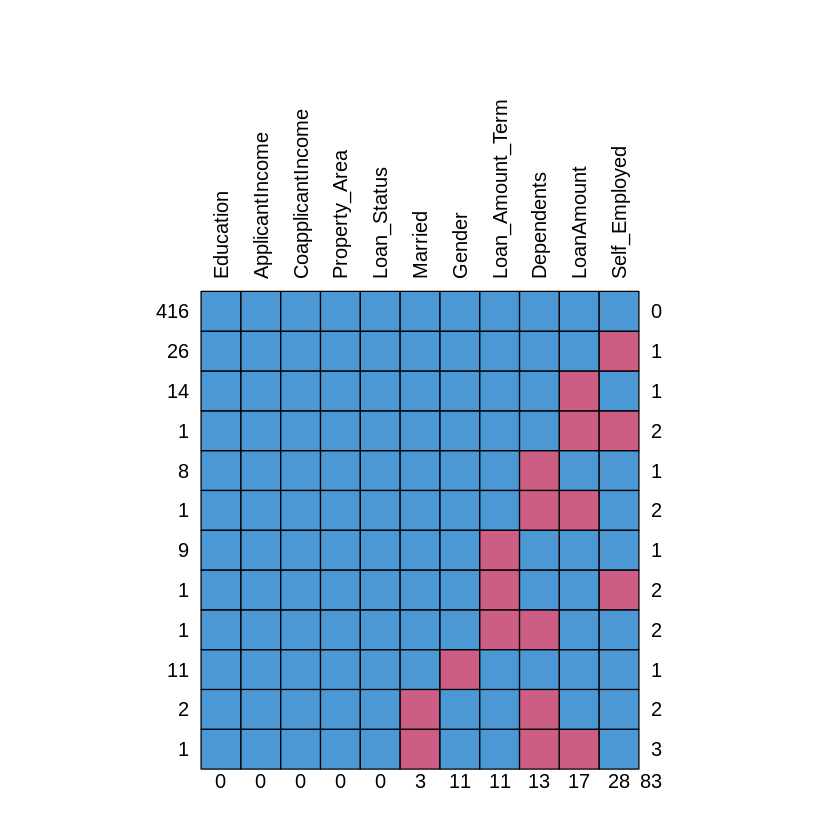

In [13]:
# Look for if there is any pattern of missingness
df %>% 
  missing_pattern(dependent, explanatory)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows conta

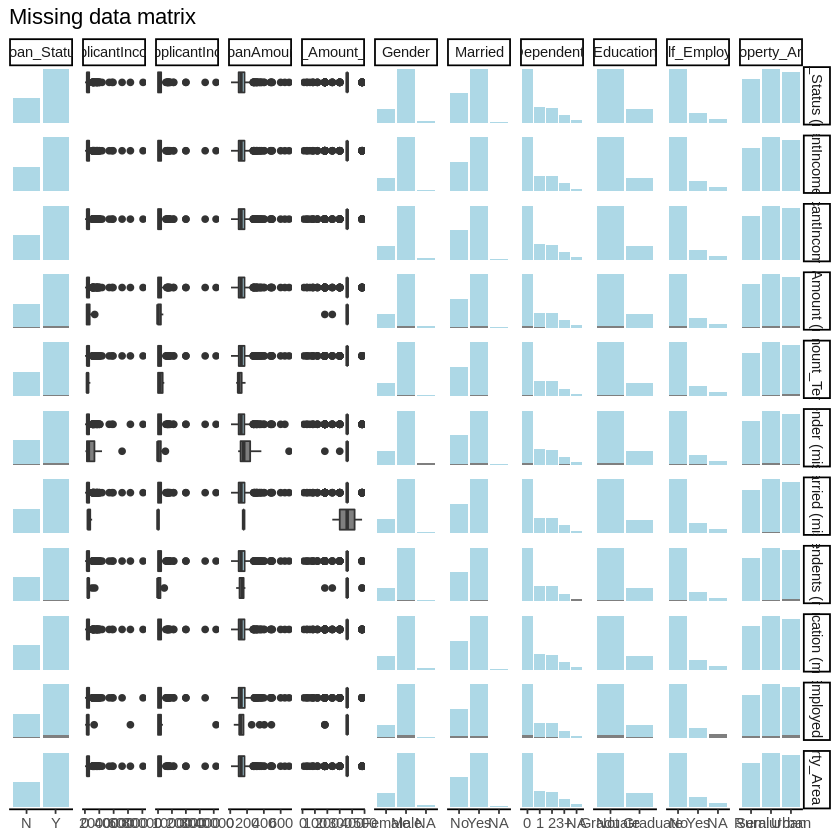

In [14]:
# Check if there is any association between missing and observed data
df %>% 
  missing_pairs(dependent, explanatory)

# Since missing is completely at random in the current dataset.

**Will impute the missing values in the variable Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History**

They are Different imputation startegies we have to choose which ine suits best to our dataset 
* Imputation Using (Mean/Median) Values
* Imputation Using (Most Frequent) or (Zero/Constant) Values
* Imputation Using ML Algorithms e.g Multivariate Imputation by Chained Equation (MICE), KNN, Datawig,Stochastic regression imputation

**In our case i will prefer missing impute with Multivariate Imputation by Chained Equation (MICE)**

In [16]:
#Imputing missing data
imputed_Data <- mice(df, m=20, maxit = 200, seed = 500)
summary(imputed_Data)


 iter imp variable
  1   1  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   2  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   3  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   4  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   5  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   6  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   7  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   8  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   9  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History
  1   10  Gender  Married  Dependents  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History

Warning message:
“Number of logged events: 1”


Class: mids
Number of multiple imputations:  20 
Imputation methods:
          Loan_ID            Gender           Married        Dependents 
               ""          "logreg"          "logreg"         "polyreg" 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
               ""          "logreg"                ""                "" 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
            "pmm"             "pmm"             "pmm"                "" 
      Loan_Status 
               "" 
PredictorMatrix:
              Loan_ID Gender Married Dependents Education Self_Employed
Loan_ID             0      1       1          1         1             1
Gender              0      0       1          1         1             1
Married             0      1       0          1         1             1
Dependents          0      1       1          0         1             1
Education           0      1       1          1         0             1
Self_E

# Merge the multiple imputed (20 fold) data to a single data frame by computing the mean or selecting the most likely imputed value for our Modeling

Here i will use Package "sjmisc" for merging the datasets

In [18]:
data_imputed <- merge_imputations(
  df,
  imputed_Data,
  ori = df,
  summary = c("none", "dens", "hist", "sd"),
  filter = NULL
)

# Select the required columns of the dataframe
data_imputed <- select(data_imputed,
       Loan_ID,Gender_imp,Married_imp,Dependents_imp,Education,Self_Employed_imp,ApplicantIncome,CoapplicantIncome,
       LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp,Property_Area,Loan_Status)

#rename the imputed variables to original name
data_imputed <- rename(data_imputed,
       Gender = Gender_imp,Married = Married_imp,Dependents = Dependents_imp,
       Self_Employed = Self_Employed_imp,LoanAmount = LoanAmount_imp, 
       Loan_Amount_Term = Loan_Amount_Term_imp,Credit_History = Credit_History_imp)

# Check missing values  in the data
summary(data_imputed)

# Write Imputed data for future refernce
write.csv(data_imputed,"data_imputed.csv", row.names = FALSE)

   Loan_ID             Gender    Married   Dependents        Education  
 Length:491         Female: 97   No :173   0 :290     Graduate    :393  
 Class :character   Male  :394   Yes:318   1 : 83     Not Graduate: 98  
 Mode  :character                          2 : 78                       
                                           3+: 40                       
                                                                        
                                                                        
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No :418       Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes: 73       1st Qu.: 2892   1st Qu.:    0     1st Qu.:101.5  
               Median : 3813   Median : 1213     Median :128.0  
               Mean   : 5450   Mean   : 1672     Mean   :146.6  
               3rd Qu.: 5929   3rd Qu.: 2254     3rd Qu.:170.0  
               Max.   :81000   Max.   :41667     Max.   :700.0  
 Loan_Amount_Term Credit_History  

# Split the data into Test and Train for the Modelling purpose

There are many options for splitting the dataset, but i wuld prefer the package caTools

Will keep SplitRatio 70%:30% i.e 70% for Training & 30% for Testing

In [19]:
#create test and train
sample= sample.split(as.data.frame(data_imputed),SplitRatio = 0.7)

x_train <- subset(as.data.frame(data_imputed),sample==TRUE)
x_test = subset(as.data.frame(data_imputed),sample==FALSE)

# Check and Treat Imbalance data class

**Purpose of dealing with imbalanced datasets is to improve our quality of classification algorithm and balancing classes in the training data before providing the data as input to the machine learning algorithm**

There are different approaches to handling Imbalanced data -
* **Under-Sampling** - *This method balances the dataset by reducing the size of the abundant class. it should be used when quantity of data is sufficient.* 

* **Over-Sampling** - *This method is used when the quantity of data is insufficient. Basically it tries to balance dataset by increasing the size of minority samples*

* **Synthetic Data Generation** - *Instead of replicating and adding the observations from the minority class, Synthetic Data Generation overcome imbalances by generating artificial data. To generate artificial data, it uses bootstrapping and k-nearest neighbors.Different packages available are  
ROSE(Random Over-Sampling Examples), SMOTE(Synthetic Minority Oversampling Technique)*

* **Cost Sensitive Learning** - *This method evaluates the cost associated with misclassifying samples. It does not create balanced data distribution. Instead, it highlights the imbalanced learning problem by using cost matrices which describes the cost for misclassification in a particular scenario.

**Here we will use Synthetic data generation technique with Package ROSE**


In [22]:
# Proportion of prediction class
cat("Proportion of prediction class before Missing Imputation\n")
round(prop.table(table(x_train$Loan_Status))*100,2)

Proportion of prediction class before Missing Imputation



    N     Y 
32.65 67.35 

In [23]:
# Imbalance data sampling with ROSE package
x_train_rose <- ROSE(Loan_Status ~ ., data = x_train[,-1],p=0.5, seed = 22)$data

cat("Proportion of prediction class after Missing Imputation\n")
round(prop.table(table(x_train_rose$Loan_Status))*100,2)

Proportion of prediction class after Missing Imputation



    Y     N 
56.18 43.82 

# Perform One-Hot Encoding For Multi Categorical Variables

The Categorical Features are those features in which datatype is an Object type.

There are different techniques available for  handling the categorical variables:

* Label Encoding or Ordinal Encoding
* One hot Encoding
* Dummy Encoding
* Binary Encoding
* Target Encoding
* etc..


Here for handling categorical features i will prefer One Hot Encoding through Sparse Matrix by Package Matrix


In [27]:
# one hot encode through sparse matrix
x_train_sparse <- sparse.model.matrix(Loan_Status ~ .-1, data = x_train_rose)
y_train_sparse = x_train_rose[,c("Loan_Status")] == "Y"

cat("Encoding of the sparse Matrix\n")
print(str(x_train_sparse))
print(dim(x_train_sparse)) # dimension of matrix
print(x_train_sparse@Dimnames[[2]]) #get variable names

Encoding of the sparse Matrix
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:2740] 2 3 4 8 11 15 27 33 41 44 ...
  ..@ p       : int [1:16] 0 81 340 537 604 639 666 745 803 1143 ...
  ..@ Dim     : int [1:2] 340 15
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:340] "1" "2" "3" "4" ...
  .. ..$ : chr [1:15] "GenderFemale" "GenderMale" "MarriedYes" "Dependents1" ...
  ..@ x       : num [1:2740] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()
  ..$ assign   : int [1:15] 1 1 2 3 3 3 4 5 6 7 ...
  ..$ contrasts:List of 6
  .. ..$ Gender       : chr "contr.treatment"
  .. ..$ Married      : chr "contr.treatment"
  .. ..$ Dependents   : chr "contr.treatment"
  .. ..$ Education    : chr "contr.treatment"
  .. ..$ Self_Employed: chr "contr.treatment"
  .. ..$ Property_Area: chr "contr.treatment"
NULL
[1] 340  15
 [1] "GenderFemale"           "GenderMale"             "MarriedYes"            
 [4] "Dependents1"            "Dependents2"            "Dependents3+"       

In [28]:
# one hot encode through sparse matrix
x_test_sparse <- sparse.model.matrix(Loan_Status ~ .-1, data = x_test[,-1])
y_test_sparse = x_test[,c("Loan_Status")] == "Y"

cat("Encoding of the sparse Matrix\n")
print(str(x_test_sparse))
print(dim(x_test_sparse)) # dimension of matrix
print(x_test_sparse@Dimnames[[2]]) #get variable names

Encoding of the sparse Matrix
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:1140] 2 6 14 32 36 37 47 51 56 58 ...
  ..@ p       : int [1:16] 0 26 151 249 273 295 309 338 359 510 ...
  ..@ Dim     : int [1:2] 151 15
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:151] "2" "6" "10" "12" ...
  .. ..$ : chr [1:15] "GenderFemale" "GenderMale" "MarriedYes" "Dependents1" ...
  ..@ x       : num [1:1140] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()
  ..$ assign   : int [1:15] 1 1 2 3 3 3 4 5 6 7 ...
  ..$ contrasts:List of 6
  .. ..$ Gender       : chr "contr.treatment"
  .. ..$ Married      : chr "contr.treatment"
  .. ..$ Dependents   : chr "contr.treatment"
  .. ..$ Education    : chr "contr.treatment"
  .. ..$ Self_Employed: chr "contr.treatment"
  .. ..$ Property_Area: chr "contr.treatment"
NULL
[1] 151  15
 [1] "GenderFemale"           "GenderMale"             "MarriedYes"            
 [4] "Dependents1"            "Dependents2"            "Dependents3+"    

Normalization of Numeric data to see if model improves

# Now our data is ready for modelling, Since our problem is related to binary classification

We can use different algorithms like - 
* Logistic Regression
* Decision Tree
* Random Forest
* Naive Bayes
* K Nearest Neighbors
* Support Vector Machines
* Stochastic Gradient Descent
* Artificial Neural Network
* AutoML

Here i will use 2 algorithms - 
* XGBoost
* Logistic regression
* Support Vector Machines

In [33]:
# Get the number of negative & positive cases in our data
postive_cases <- sum(y_train_sparse == TRUE)
negative_cases <- sum(y_train_sparse == FALSE)

# default parameters
params <- list(booster = "gbtree", objective = "binary:logistic", 
                 eta=0.3, gamma=0, 
                 max_depth=9, min_child_weight=1, 
                 subsample=0.5, colsample_bytree=0.6)

# Cross fold validation & hyperparameters
set.seed(10)
xgbcv <- xgb.cv( params = params, data = x_train_sparse,label = y_train_sparse,
                 nrounds = 200, nfold = 20, 
                 showsd = T, stratified = T, 
                 print_every_n = 10, early_stopping_rounds = 20,
                 maximize = F)

#identifying best iteration
cat("Best iteration\n")
print(xgbcv$best_iteration )


[05:33:59] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:33:59] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:33:59] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:33:59] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly

In [34]:
# Final XGBoost Model
set.seed(11)
xgbst_model <- xgboost(data = x_train_sparse, label = y_train_sparse, 
                       max_depth = 9, # the maximum depth of each decision tree
                       eta = 0.3, # It controls the learning rate
                       nthread = 2, #Activates parallel computation
                       subsample = 0.5, #controls the number of samples (observations) supplied to a tree
                       colsample_bytree = 0.6, #control the number of features (variables) supplied to a tree
                       nrounds = 28, # controls the maximum number of iterations 
                       early_stopping_rounds = 10, # if we dont see an improvement in this many rounds, stop
                       maximize = F,
                       objective = "binary:logistic",  # the objective function 
                       scale_pos_weight = negative_cases/postive_cases # control for imbalanced classes
)  

[05:34:59] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.640244 
Will train until train_logloss hasn't improved in 10 rounds.

[2]	train-logloss:0.477979 
[3]	train-logloss:0.383782 
[4]	train-logloss:0.328341 
[5]	train-logloss:0.283992 
[6]	train-logloss:0.250778 
[7]	train-logloss:0.226652 
[8]	train-logloss:0.209179 
[9]	train-logloss:0.195418 
[10]	train-logloss:0.190351 
[11]	train-logloss:0.180964 
[12]	train-logloss:0.175222 
[13]	train-logloss:0.171460 
[14]	train-logloss:0.163667 
[15]	train-logloss:0.160730 
[16]	train-logloss:0.153564 
[17]	train-logloss:0.153113 
[18]	train-logloss:0.145612 
[19]	train-logloss:0.142633 
[20]	train-logloss:0.137017 
[21]	train-logloss:0.130603 
[22]	train-logloss:0.127746 
[23]	train-logloss:0.122139 
[24]	train-logl

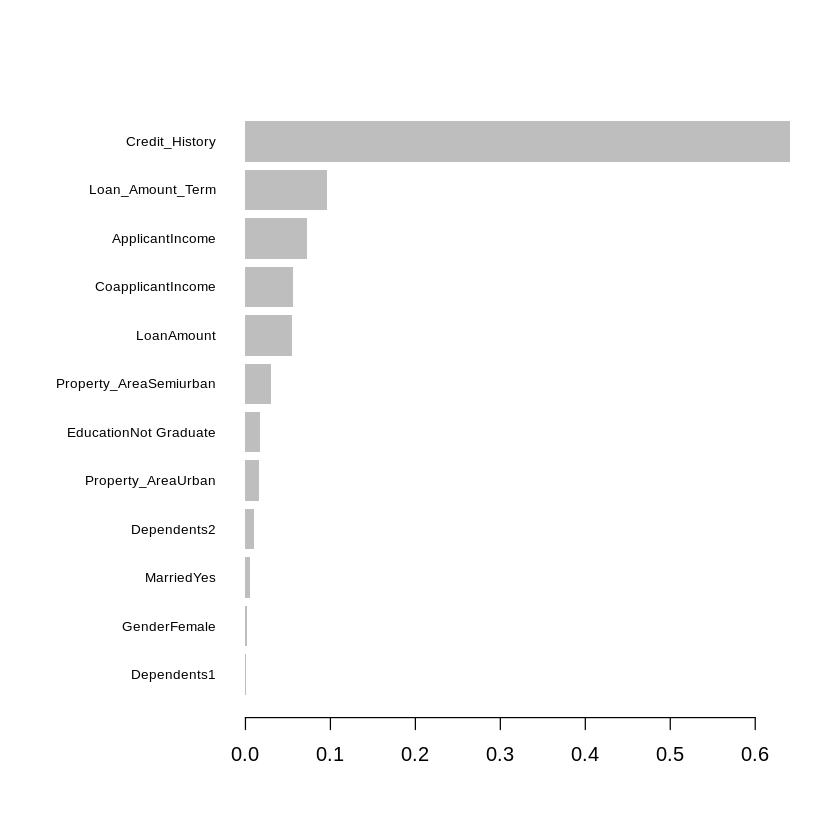

In [35]:
# Feature Importance
importance <- xgb.importance(feature_names = colnames(x_train_sparse), model = xgbst_model)
xgb.plot.importance(importance)

In [39]:
# Generate predictions for our held-out testing data
pred <- predict(xgbst_model, x_test_sparse)

# Evaluation of Model:

* Precision/Specificity: how many selected instances are relevant.
* Recall/Sensitivity: how many relevant instances are selected.
* F1 score: harmonic mean of precision and recall.
* AUC: relation between true-positive rate and false positive rate.

In [43]:
prediction = as.factor(ifelse(pred > 0.5,"Y","N"))
cm <- confusionMatrix(prediction,x_test[,c("Loan_Status")], mode = "prec_recall", positive="Y")
cat("XGBoost Model: Confusion Matrix:\n")
print(cm)

XGBoost Model: Confusion Matrix
Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N  12   5
         Y  30 104
                                          
               Accuracy : 0.7682          
                 95% CI : (0.6927, 0.8329)
    No Information Rate : 0.7219          
    P-Value [Acc > NIR] : 0.1177          
                                          
                  Kappa : 0.2935          
                                          
 Mcnemar's Test P-Value : 4.976e-05       
                                          
              Precision : 0.7761          
                 Recall : 0.9541          
                     F1 : 0.8560          
             Prevalence : 0.7219          
         Detection Rate : 0.6887          
   Detection Prevalence : 0.8874          
      Balanced Accuracy : 0.6199          
                                          
       'Positive' Class : Y               
                                         

Area under curve
[1] 0.6932066
KS statistics


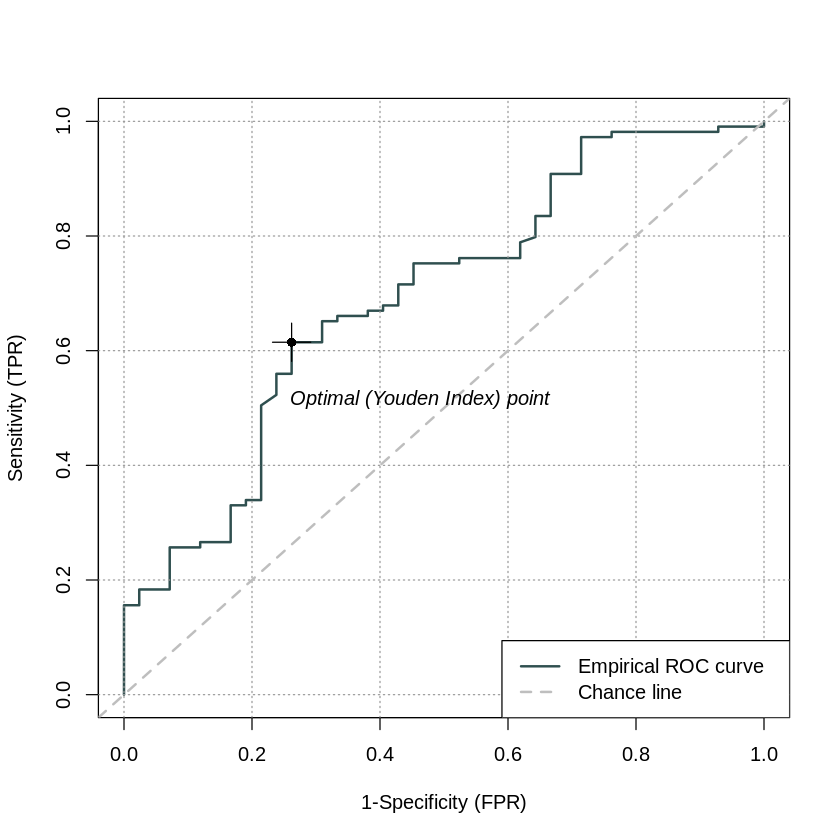

$method
[1] "empirical"

$Cutoff
  [1] 0.993151307 0.992688179 0.992527485 0.991166890 0.990954936 0.990744948
  [7] 0.989784062 0.989658773 0.989225090 0.989200830 0.988311231 0.988260627
 [13] 0.988195300 0.988105178 0.986570299 0.986400723 0.986019731 0.985553443
 [19] 0.984809220 0.983257115 0.982843876 0.982715964 0.982546985 0.982350349
 [25] 0.982083917 0.980912089 0.980870903 0.980264068 0.979874790 0.979769349
 [31] 0.979383767 0.979373455 0.979335725 0.979026675 0.978862166 0.978364527
 [37] 0.977990150 0.977864444 0.977372587 0.976898849 0.975803375 0.974731088
 [43] 0.973645926 0.972941697 0.972649276 0.972617149 0.971963406 0.971494675
 [49] 0.970256507 0.969489872 0.967545271 0.966627717 0.965411723 0.965210855
 [55] 0.965064943 0.964255571 0.963806868 0.962773263 0.961913705 0.961903751
 [61] 0.961491346 0.960720956 0.959836602 0.958014727 0.957776725 0.956507683
 [67] 0.952982962 0.952713907 0.952296793 0.951899648 0.951690555 0.949979961
 [73] 0.949577451 0.949514151 0

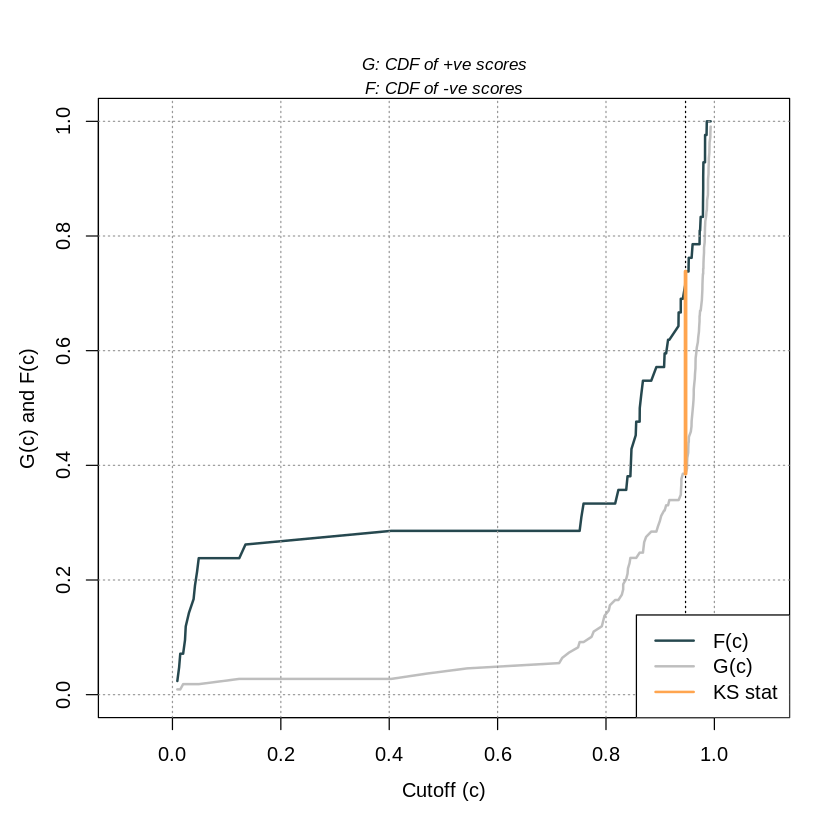

In [47]:
ROCit_obj <- rocit(score=pred,class=x_test[,c("Loan_Status")])
plot(ROCit_obj)

#Area under curve
cat("Area under curve\n")
print(ROCit_obj$AUC)

cat("KS statistics\n")
ksplt <- ksplot(ROCit_obj)
print(ksplt)

#KS statistics
ksplot(ROCit_obj)



In [48]:
logist <- glm(Loan_Status ~ ., family = binomial,data = x_train[,-1])
summary(logist)



Call:
glm(formula = Loan_Status ~ ., family = binomial, data = x_train[, 
    -1])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5045  -0.2122   0.4398   0.6563   2.5558  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -4.196e+00  1.336e+00  -3.141  0.00168 ** 
GenderMale             -2.132e-03  4.346e-01  -0.005  0.99609    
MarriedYes              5.598e-01  3.813e-01   1.468  0.14203    
Dependents1             2.450e-01  4.640e-01   0.528  0.59756    
Dependents2             5.974e-01  5.061e-01   1.181  0.23780    
Dependents3+            9.488e-01  7.769e-01   1.221  0.22198    
EducationNot Graduate  -8.001e-01  3.946e-01  -2.028  0.04259 *  
Self_EmployedYes       -2.171e-01  4.792e-01  -0.453  0.65057    
ApplicantIncome         6.084e-05  6.929e-05   0.878  0.37995    
CoapplicantIncome       2.607e-05  7.542e-05   0.346  0.72963    
LoanAmount             -2.415e-03  2.955e-03  -0.817  0.41380

In [51]:
# Pseudo R_squared values and Likelihood ratio test
nagelkerke(logist)


$Models
                                                      
Model: "glm, Loan_Status ~ ., binomial, x_train[, -1]"
Null:  "glm, Loan_Status ~ 1, binomial, x_train[, -1]"

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                             0.369881
Cox and Snell (ML)                   0.373290
Nagelkerke (Cragg and Uhler)         0.520424

$Likelihood.ratio.test
 Df.diff LogLik.diff  Chisq   p.value
     -14     -79.436 158.87 1.196e-26

$Number.of.observations
          
Model: 340
Null:  340

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"

In [52]:
# predict the test dataset
pred <- predict(logist, x_test, type="response") 


In [53]:
prediction = as.factor(ifelse(pred > 0.5,"Y","N"))
cm <- confusionMatrix(prediction,x_test[,c("Loan_Status")], mode = "prec_recall", positive="Y")
cat("Logistic Regression Model: Confusion Matrix:\n")
print(cm)


Logistic Regression Model: Confusion Matrix:
Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N  12   6
         Y  30 103
                                          
               Accuracy : 0.7616          
                 95% CI : (0.6855, 0.8271)
    No Information Rate : 0.7219          
    P-Value [Acc > NIR] : 0.1588747       
                                          
                  Kappa : 0.2798          
                                          
 Mcnemar's Test P-Value : 0.0001264       
                                          
              Precision : 0.7744          
                 Recall : 0.9450          
                     F1 : 0.8512          
             Prevalence : 0.7219          
         Detection Rate : 0.6821          
   Detection Prevalence : 0.8808          
      Balanced Accuracy : 0.6153          
                                          
       'Positive' Class : Y               
                            

Area under curve
[1] 0.6579292
KS statistics


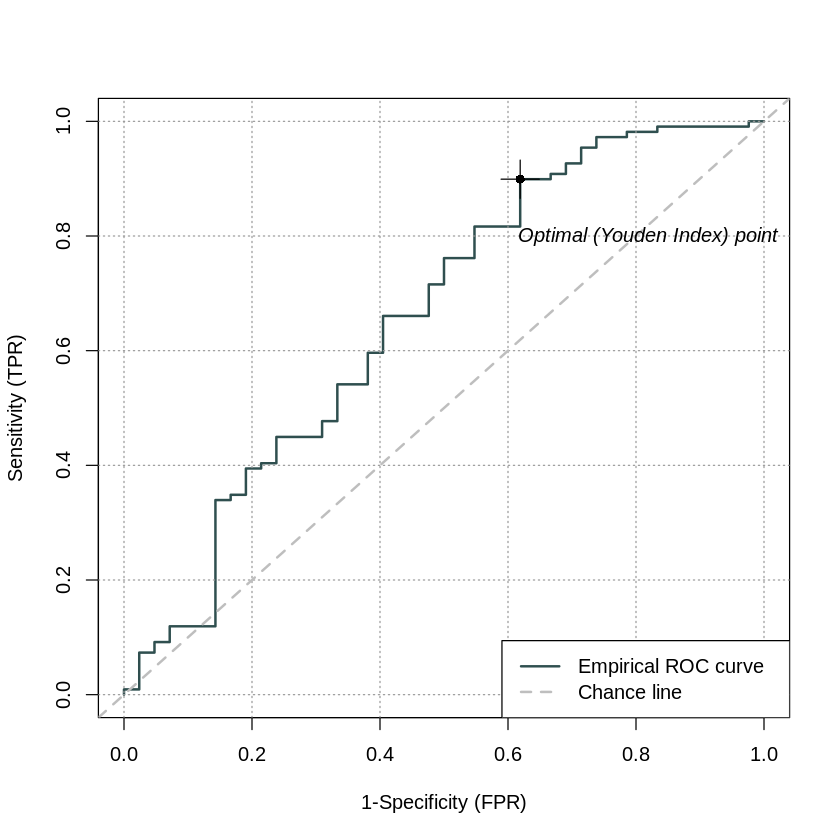

$method
[1] "empirical"

$Cutoff
  [1] 0.98412327 0.98328042 0.98220572 0.96499152 0.95765936 0.95415048
  [7] 0.95254140 0.95007730 0.94776617 0.94620907 0.94188614 0.94056101
 [13] 0.93646902 0.93396125 0.93067073 0.93028750 0.92804761 0.92544655
 [19] 0.92343797 0.92195832 0.92168774 0.92157933 0.92006611 0.91913091
 [25] 0.91748082 0.91683506 0.91586332 0.91498438 0.91491501 0.91472420
 [31] 0.91389555 0.91192132 0.90917402 0.90878389 0.90869896 0.90679768
 [37] 0.90585465 0.90576203 0.90492854 0.90455018 0.90438243 0.90272187
 [43] 0.90126120 0.89773307 0.89702201 0.89563609 0.88751019 0.88592436
 [49] 0.88368568 0.88311196 0.88170830 0.87346937 0.86795231 0.86354481
 [55] 0.86286992 0.86046577 0.85789348 0.85706423 0.85452685 0.84971927
 [61] 0.84379869 0.84140244 0.84042635 0.83831157 0.83567338 0.83210920
 [67] 0.83134468 0.82559021 0.81785249 0.81105029 0.80820618 0.80697649
 [73] 0.80689461 0.80498857 0.80069962 0.79789452 0.79278224 0.79114470
 [79] 0.78277201 0.77782944 0.7

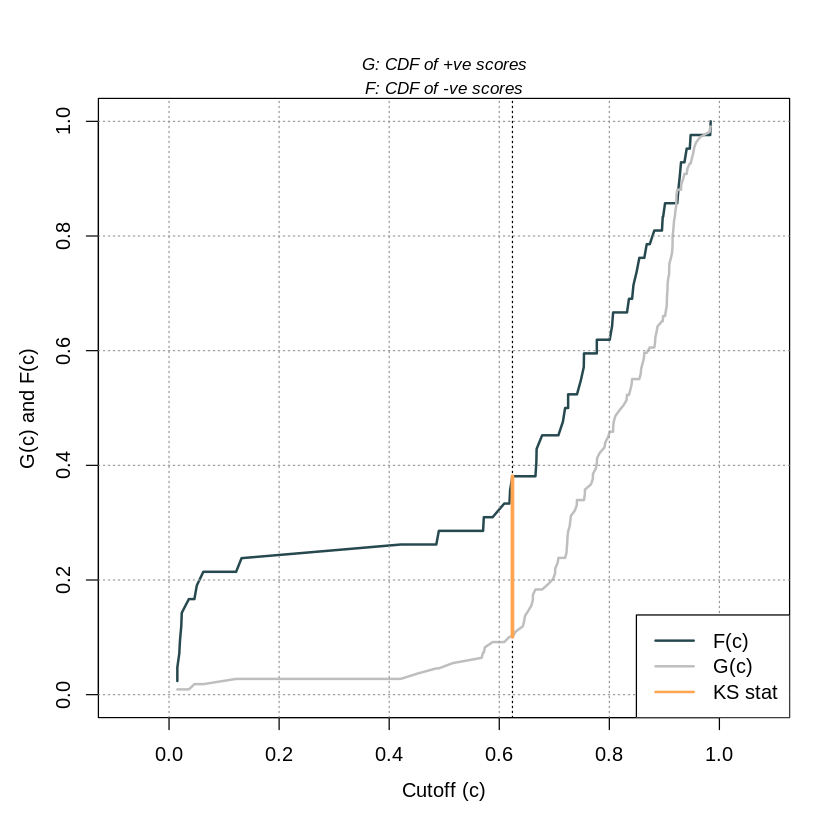

In [54]:
ROCit_obj <- rocit(score=pred,class=x_test[,c("Loan_Status")])
plot(ROCit_obj)

#Area under curve
cat("Area under curve\n")
print(ROCit_obj$AUC)

cat("KS statistics\n")
ksplt <- ksplot(ROCit_obj)
print(ksplt)

#KS statistics
ksplot(ROCit_obj)

In [78]:
# logist <- glm(Loan_Status ~ ., family = binomial,data = x_train[,-1])
# summary(logist)

svmfit = svm(Loan_Status ~ .,
             data = x_train[,-1], 
             kernel = "linear", #polynomial , radial , linear
             probability=TRUE,
             cost = 10, 
             scale = FALSE)

summary(svmfit)             


Call:
svm(formula = Loan_Status ~ ., data = x_train[, -1], kernel = "linear", 
    probability = TRUE, cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  102

 ( 56 46 )


Number of Classes:  2 

Levels: 
 N Y




In [71]:
table(x_train$Loan_Status, predict(svmfit))

   
      N   Y
  N  35  76
  Y  28 201

In [89]:
pred <- predict(svmfit,x_test[, -1],probability=TRUE)
head(attr(pred, "probabilities"))

,Y,N
2,0.5904901840,0.4095098
6,0.0007018668,0.9992981
10,0.8430715026,0.1569285
12,0.7302316063,0.2697684
15,0.7460635043,0.2539365
19,0.6733614061,0.3266386


In [81]:
# prediction = as.factor(ifelse(pred > 0.5,"Y","N"))
cm <- confusionMatrix(pred,x_test[,c("Loan_Status")], mode = "prec_recall", positive="Y")
cat("SVM Non linear Model: Confusion Matrix:\n")
print(cm)


SVM Non linear Model: Confusion Matrix:
Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N   8   6
         Y  34 103
                                          
               Accuracy : 0.7351          
                 95% CI : (0.6572, 0.8035)
    No Information Rate : 0.7219          
    P-Value [Acc > NIR] : 0.3975          
                                          
                  Kappa : 0.1703          
                                          
 Mcnemar's Test P-Value : 1.963e-05       
                                          
              Precision : 0.7518          
                 Recall : 0.9450          
                     F1 : 0.8374          
             Prevalence : 0.7219          
         Detection Rate : 0.6821          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.5677          
                                          
       'Positive' Class : Y               
                                 

# Comparing the Results
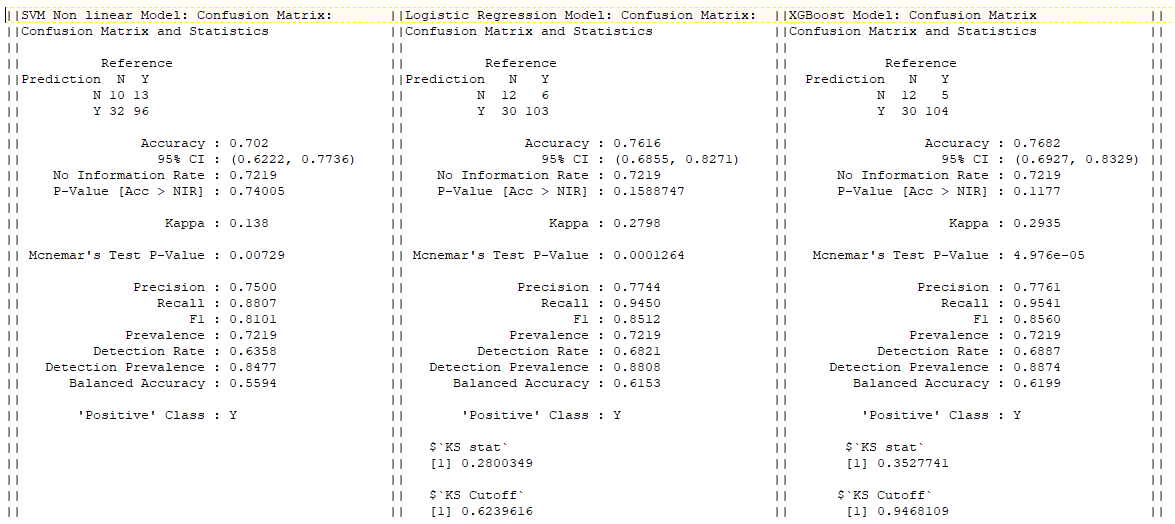

That's it for now!

**Now Answer to your questions** 

# **Q. How did you handle missing data?**
> Datasets contain missing values for various reasons. They are often encoded as NA, blanks or any other place values. Training a model with a 
missing dataset drastically impact the ML model quality.

> There are three types of missing data -
* Missing Completely at Random (MCAR) – when data is completely missing at random across the dataset with no discernable pattern. 
* Missing At Random (MAR) – when data is not missing randomly, but only within sub-samples of data. 
* Not Missing at Random (NMAR), when there is a noticeable trend in the way data is missing.

> Techniques to handle missing data -
* Deletion methods to eliminate missing data
* Replace with Mean/Median Values
* Replace with Most Frequent or Constant Values
* Imputation Using ML Algorithms e.g Multivariate Imputation by Chained Equation (MICE), KNN, Datawig,Stochastic regression imputation

> In this case missing imputation was done with Multivariate Imputation by Chained Equation (MICE) for missing variables 
Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History


# **Q. How did you handle categorical (string) data?**
> Categorical data are more challenging to deal with than numerical data. There are different techniques available for handling the categorical variables:
* Label Encoding or Ordinal Encoding
* One hot Encoding
* Dummy Encoding
* Binary Encoding
* Target Encoding
* etc..

> one-hot encoding is the best technique for the the categorical features, especially when there does not exist a natural ordering
between the categories. For each unique value of a feature, one column is created where the value is 1 if for that instance the original feature takes
that value and 0 otherwise. Hence for handling categorical features, here will use One Hot Encoding through Sparse Matrix by Package Matrix

# **Q. How did you handle unbalanced data?**
> Purpose of dealing with imbalanced datasets is to improve our quality of classification algorithm and balancing classes in the training data before
providing the data as input to the machine learning algorithm

> There are different approaches to handling Imbalanced data -
* Under-Sampling - This method balances the dataset by reducing the size of the abundant class. it should be used when quantity of data is sufficient.
* Over-Sampling - This method is used when the quantity of data is insufficient. Basically it tries to balance dataset by increasing the size of minority samples
* Cost Sensitive Learning - *This method evaluates the cost associated with misclassifying samples. It does not create balanced data distribution. Instead, it highlights the imbalanced learning problem by using cost matrices which describes the cost for misclassification in a particular scenario.
* Synthetic Data Generation - Instead of replicating and adding the observations from the minority class, Synthetic Data Generation overcome imbalances by generating artificial data. To generate artificial data, it uses bootstrapping and k-nearest neighbors.Different packages available are
ROSE(Random Over-Sampling Examples), SMOTE(Synthetic Minority Oversampling Technique)

> Here we will use Synthetic data generation technique with Package ROSE.

# **Q. How did you test your model?**
# **Q. Describe your model and why did you choose this model over other types of models?**
# **Q. Describe any other models you have tried and why do you think this model performs better?**